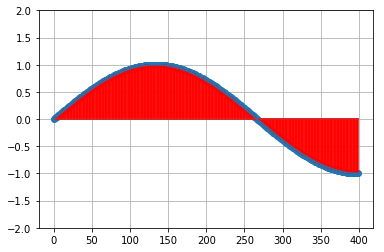

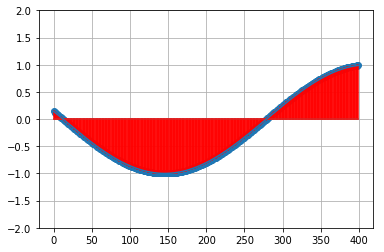

sig= 6.917854385822338e-05
embarrassingly_parallel
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
particle_filter
working on model  probit_sin_wave
CMC
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
1
2
3
CMC_wass
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
computing waserstein barrycenter...
collecting parameter info from shards...
data successfully prepared...
machine weights:  [0.21    0.25875 0.34875 0.2225 ]
1
computing waserstein barrycenter...
collecting parame

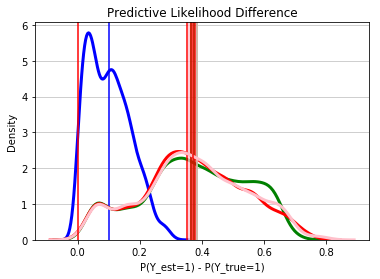

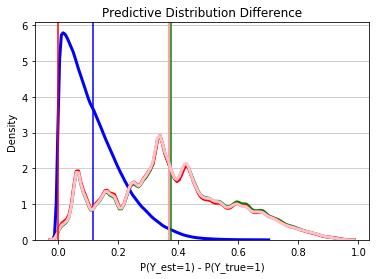

In [3]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_num = 20

M=4
PART_NUM=1000
epoch_at=[99,199,299,399]#[49,75,99,124,149,174,199,224,249,275,299,324,349,374,389,399]
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()
cmc_wass_run=list()

for rt in range(run_num):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)
    
    print("embarrassingly_parallel")
    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()
    print("particle_filter")
    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    print("CMC")
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    print("CMC_wass")
    cmcwassobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcwassobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)    
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    cmc_wass_run.append(cmcwassobj)
    
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_4_way_experiment_run(single_run, par_run, cmc_run, cmc_wass_run,  test)

In [4]:
epochs2=[199,399]
epochs8=[49,99,149,199,249,299,349,399]
epochs16=[24,49,74,99,124,149,174,199,224,249,274,299,324,349,374,399]
te=list(range(0,400,10))
te.append(399)
epochs40=te

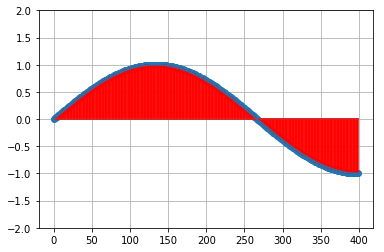

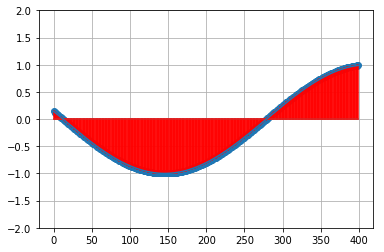

sig= 6.917854385822338e-05
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
CMC_wass
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
computing waserstein barrycenter...
collecting parameter info from shards...
data successfully prepared...
machine weights:  [0.62  0.22  0.065 0.135]
1
computing waserstein barrycenter...
collecting parameter info from shards...
data successfully prepared...
mach

In [5]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs2
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    print("CMC_wass")
    cmcwassobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcwassobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)    
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    cmc_wass_run.append(cmcwassobj)

let's plot some particle filters!


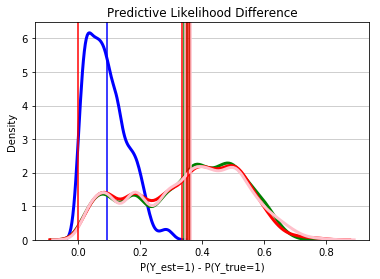

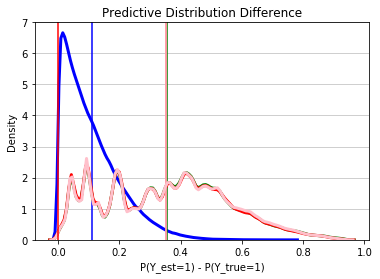

In [7]:
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_4_way_experiment_run(single_run, par_run, cmc_run, cmc_wass_run,  test)

In [ ]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs8
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    print("CMC_wass")
    cmcwassobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcwassobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)    
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    cmc_wass_run.append(cmcwassobj)

In [ ]:
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_4_way_experiment_run(single_run, par_run, cmc_run, cmc_wass_run,  test)

In [ ]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs16
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    print("CMC_wass")
    cmcwassobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcwassobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)    
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    cmc_wass_run.append(cmcwassobj)

In [ ]:
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_4_way_experiment_run(single_run, par_run, cmc_run,cmc_wass_run,  test)

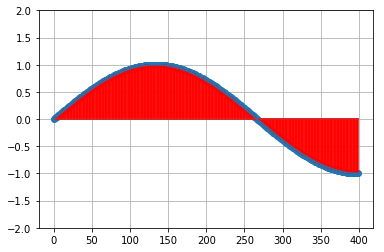

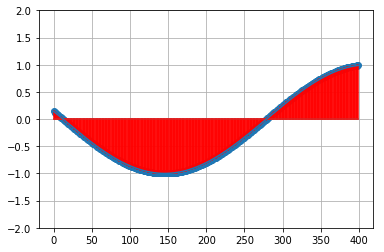

sig= 6.917854385822338e-05
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
CMC_wass
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
computing waserstein barrycenter...
collecting parameter info from shards...
data successfully prepared...
machine weights:  [0.255 0.285 0.265 0.235]
1
computing waserstein barrycenter...
collecting parameter info from shards...
data successfully prepared...
mach

In [14]:
import timeit
start_time = timeit.default_timer()

import numpy as np
import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs40
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    print("CMC_wass")
    cmcwassobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcwassobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)    
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    cmc_wass_run.append(cmcwassobj)
elapsed = timeit.default_timer() - start_time


let's plot some particle filters!


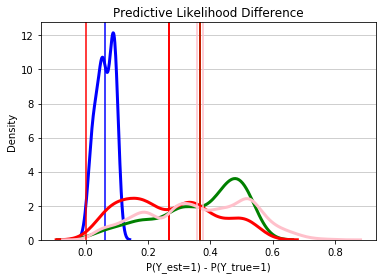

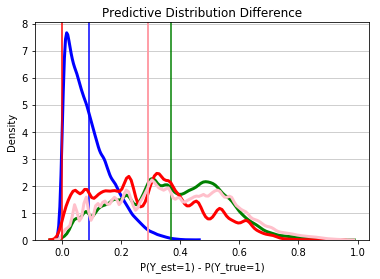

In [19]:
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_4_way_experiment_run(single_run, par_run, cmc_run, cmc_wass_run, test)

8.985083053505514